In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
data = pd.get_dummies(data, drop_first=True)

In [10]:
data = data.astype(int)

In [11]:
print(data.head())

   CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2        0              1          1   
1          608   41       1    83807              1          0   
2          502   42       8   159660              3          1   
3          699   39       1        0              2          0   
4          850   43       2   125510              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1           101348       1                  0   
1               1           112542       0                  0   
2               0           113931       1                  0   
3               0            93826       0                  0   
4               1            79084       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0  


In [12]:
print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


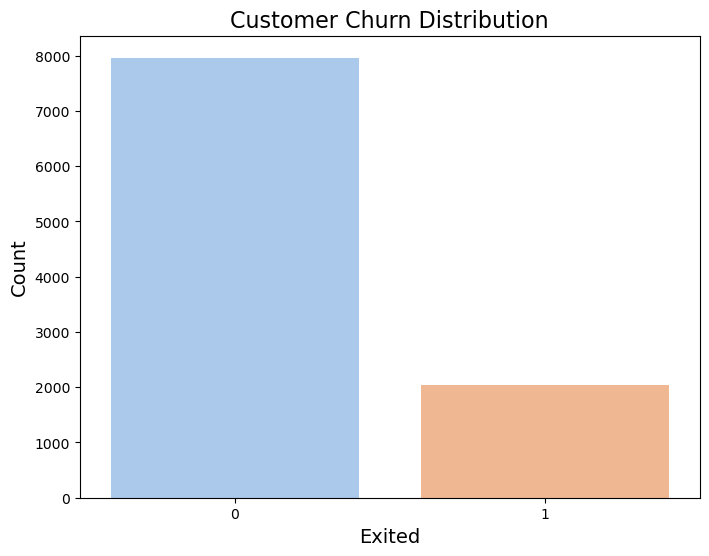

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data, palette='pastel')
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [14]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
threshold = 0.5

In [19]:
y_train_classified = [1 if value > threshold else 0 for value in y_train]


In [20]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [21]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = accuracy_score(y_test_classified, LR.predict(X_test_scaled))
print("Logistic Regression Model Accuracy:", accuracy1)

Logistic Regression Model Accuracy: 0.809


In [22]:
svm = SVC()
svm.fit(X_train_scaled, y_train_classified)

SVC()

In [23]:
accuracy2 = accuracy_score(y_test_classified, svm.predict(X_test_scaled))
print("Support Vector Machine Model Accuracy:", accuracy2)

Support Vector Machine Model Accuracy: 0.865


In [24]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [25]:
accuracy3 = accuracy_score(y_test_classified, rf.predict(X_test_scaled))
print("Random Forest Model Accuracy:", accuracy3)

Random Forest Model Accuracy: 0.875


In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [27]:
accuracy4 = accuracy_score(y_test_classified, dt.predict(X_test_scaled))
print("Decision Tree Model Accuracy:", accuracy4)


Decision Tree Model Accuracy: 0.803


In [28]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [29]:
accuracy5 = accuracy_score(y_test_classified, KNN.predict(X_test_scaled))
print("K-Nearest Neighbors Model Accuracy:", accuracy5)

K-Nearest Neighbors Model Accuracy: 0.84


In [30]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [31]:
accuracy6 = accuracy_score(y_test_classified, GBC.predict(X_test_scaled))
print("Gradient Boosting Model Accuracy:", accuracy6)

Gradient Boosting Model Accuracy: 0.867


In [32]:
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
})

In [33]:
print(performance_summary)

                    Model  Accuracy
0     Logistic Regression     0.809
1  Support Vector Machine     0.865
2           Random Forest     0.875
3           Decision Tree     0.803
4     K-Nearest Neighbors     0.840
5       Gradient Boosting     0.867
